In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
def collatz(n, return_=None):
  iter_ = 1
  vals = [n]

  while n != 1:
    n = n/2 if n%2==0 else 3*n+1
    vals.append(n)
    iter_ += 1

  if not return_:
    return True
  elif return_ == 'iter':
    return iter_
  elif return_ == 'vals':
    return vals

stopping time of 6171: 262


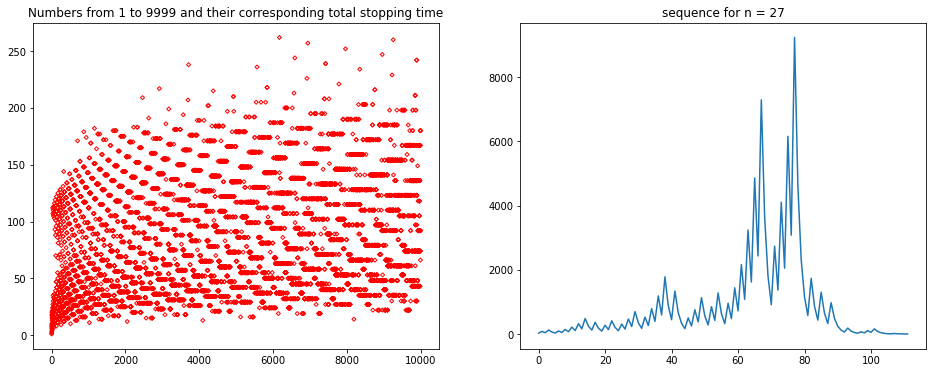

In [ ]:
x = range(1,9999)
y = [collatz(i, return_='iter') for i in x]
longest = np.argmax(y)
print(f'stopping time of {1+longest}: {y[longest]}')

fig, axs = plt.subplots(1,2, figsize=(16,6))

plt.axes(axs[0])
plt.title('Numbers from 1 to 9999 and their corresponding total stopping time')
plt.scatter(x,y, s=8, marker='D', facecolors='none', edgecolors='r')

plt.axes(axs[1])
plt.plot(collatz(27, return_='vals'))
plt.title('sequence for n = 27')

plt.show()

  0%|          | 0/99999 [00:00<?, ?it/s]

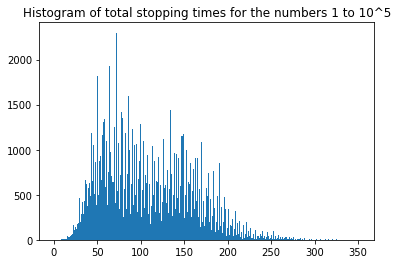

In [ ]:
x = range(1,10**5)
y = [collatz(i, return_='iter') for i in tqdm(x)]

plt.hist(y, bins=300)
plt.title('Histogram of total stopping times for the numbers 1 to 10^5')
plt.show()

### Iterating on real or complex numbers


$$ f(z) = \frac{1}{2} z \cos^{2} \left ( \frac{\pi}{2} z \right ) +
\frac{3z+1}{2} \sin^{2} \left ( \frac{\pi}{2} z \right ) $$
which simplifies to
$$ f(z) = \frac{1}{4} \left ( 1+4z-(1+2z) \cos(\pi z) \right ) $$

In [ ]:
# from PIL import Image
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

In [ ]:
# define size
# using top left and bottom right coordinates
img_size = ((0,0),(4096,4096))
plot_size = ((-12,-1),(12,1))

def set_params(plot_size, img_size):
  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size

  # define parameters
  plot_xSteps = img_x1 - img_x0
  plot_ySteps = img_y1 - img_y0
  params = {"plot_xSteps":plot_xSteps, "plot_ySteps":plot_ySteps}
  return params

params = set_params(plot_size, img_size)

In [ ]:
def show_img(plot_size,img_size, dpi=50):
  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size

  # dpi = plt.rcParams['figure.dpi'] # get the default dpi value
  fig_size = np.array(img.shape[:2])//dpi # figure size
  fig_size[1] = np.round(fig_size[1] * (plot_y1-plot_y0)/(plot_x1-plot_x0))

  plt.figure(figsize=fig_size)
  plt.imshow(img, aspect='auto')

  # xlen = 2*len(plt.gca().get_xticks())
  # ylen = 2*len(plt.gca().get_yticks())
  xlen, ylen = 12, 12

  xlen += (xlen+1)%2; ylen += (ylen+1)%2
  xticks = np.linspace(img_x0,img_x1-1,xlen)
  yticks = np.linspace(img_y0,img_y1-1,ylen)
  xlabels = np.round(np.linspace(plot_x0,plot_x1,xlen),2)
  ylabels = np.round(np.linspace(plot_y1,plot_y0,ylen),2)
  ylabels = [str(l)+'i' for l in ylabels]

  plt.xticks(ticks=xticks, labels=xlabels)
  plt.yticks(ticks=yticks, labels=ylabels)
  plt.xlabel("Re")
  plt.ylabel("Im")

  plt.show()

In [ ]:
def plot_func(plot_size,img_size,params, shortcut=True):

  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  #img = Image.new('HSV', (img_w, img_h), (0,0,0))
  img = np.zeros((img_w, img_h, 3))

  x = np.linspace(plot_x0, plot_x1, params["plot_xSteps"])
  y = np.linspace(plot_y0, plot_y1, params["plot_ySteps"])
  xx, yy = np.meshgrid(x,y)
  zz = xx + yy*1j
  #zz = diPi(zz)

  if shortcut:
    collatz = lambda z: 0.25*(1 + 4*z - (1+2*z)*np.cos(np.pi*z))  # shortcut
  else:  
    collatz = lambda z: 0.25*(2 + 7*z - (2+5*z)*np.cos(np.pi*z))  # without shortcut
  max_iters = 100
  zz_iter = (max_iters-1) * np.ones_like(zz, dtype=float)

  for iter_ in tqdm(range(max_iters)):
    zz_mask = np.isnan(zz)
    zz_iter[ (zz_iter==max_iters-1) &  zz_mask] = iter_   # store the iterations for nan values
    zz[~zz_mask] = collatz(zz[~zz_mask])    # only iterate over non nan values

  zz[np.isnan(zz)] = 0
  zz_scaled_iter = zz_iter/(max_iters-1)

  # color depends on the angle of the roots
  angle = np.angle(zz, deg=True)
  # adjust color to lerp from blue (H:240) to yello (H:60)
  angle = angle + 240 - 180*5.5*zz_scaled_iter
  angle = (angle % 360) / 360   # [0,1]
  
  h = angle
  s = zz_scaled_iter
  s = np.log(zz_iter+1)/np.log(max_iters)   # [0,1]
  s = 1 - s   # 0 is white, 1 is full saturation
  approx_equal = lambda a,b,tol: abs(a-b) < tol
  v = np.where(zz_iter == max_iters-1, 0, 1)  # 0 is black, 1 is full value

  #s,v = np.ones_like(zz,dtype=float), np.ones_like(zz,dtype=float)
  
  img = np.dstack((h,s,v))
  # print(np.unique(np.round(zz,3)))
  return hsv_to_rgb(img)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in cos
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


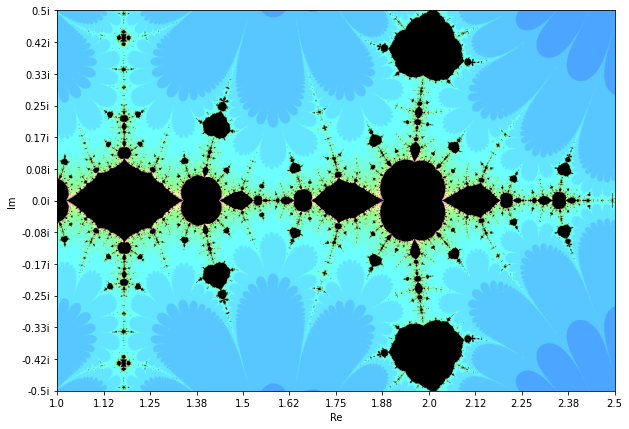

In [ ]:
img_size = ((0,0),(1024,1024))
plot_size = ((1,-0.5),(2.5,0.5))
params = set_params(plot_size, img_size)

img = plot_func(plot_size,img_size,params)
show_img(plot_size,img_size, dpi=100)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in cos
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


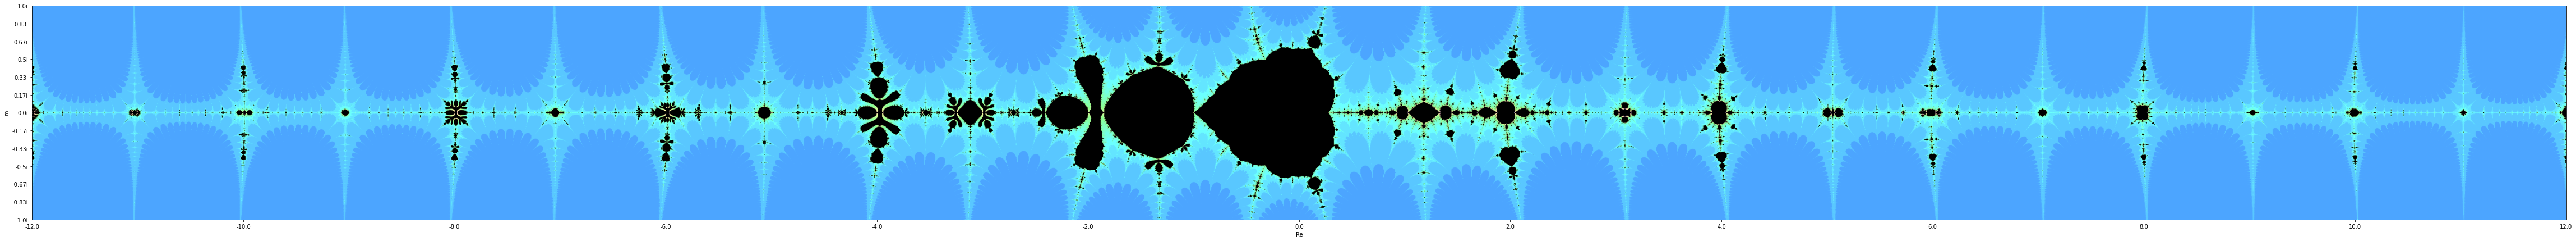

In [ ]:
img_size = ((0,0),(4096,4096))
plot_size = ((-12,-1),(12,1))
params = set_params(plot_size, img_size)

img = plot_func(plot_size,img_size,params)
show_img(plot_size,img_size)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in cos
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


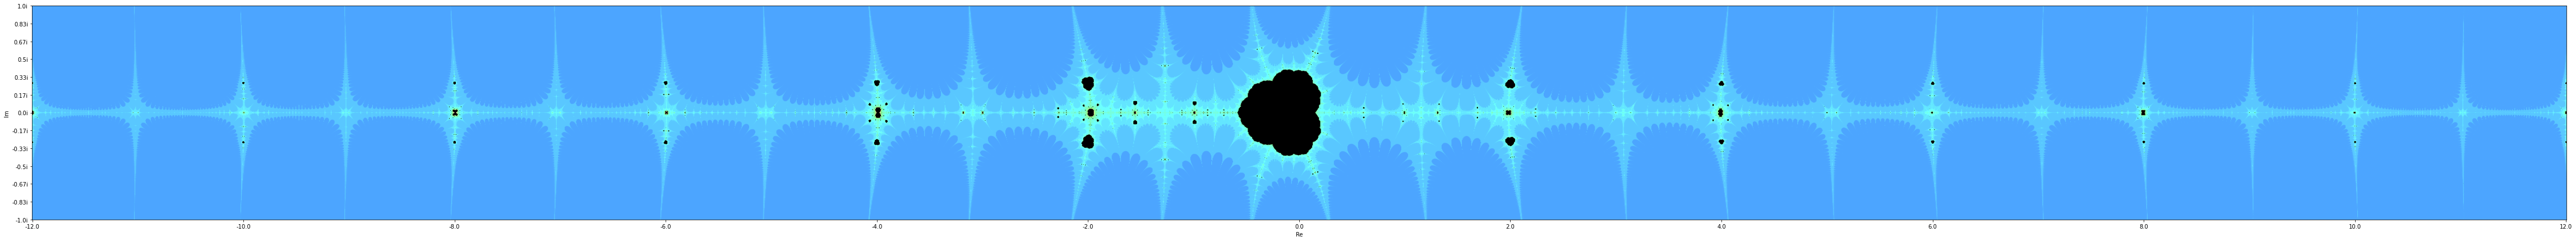

In [ ]:
img = plot_func(plot_size,img_size,params, shortcut=False)
show_img(plot_size,img_size)